<a href="https://colab.research.google.com/github/AndreVelasques7/inteligencia_computacional/blob/main/ed-07/pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteração 1/100, Melhor Valor Global: 3.0742
Iteração 2/100, Melhor Valor Global: 3.0742
Iteração 3/100, Melhor Valor Global: 3.0742
Iteração 4/100, Melhor Valor Global: 3.0742
Iteração 5/100, Melhor Valor Global: 3.0990
Iteração 6/100, Melhor Valor Global: 3.0990
Iteração 7/100, Melhor Valor Global: 3.0990
Iteração 8/100, Melhor Valor Global: 3.1016
Iteração 9/100, Melhor Valor Global: 3.1016
Iteração 10/100, Melhor Valor Global: 3.1016
Iteração 11/100, Melhor Valor Global: 3.1016
Iteração 12/100, Melhor Valor Global: 3.1016
Iteração 13/100, Melhor Valor Global: 3.1016
Iteração 14/100, Melhor Valor Global: 3.1016
Iteração 15/100, Melhor Valor Global: 3.1016
Iteração 16/100, Melhor Valor Global: 3.1026
Iteração 17/100, Melhor Valor Global: 3.1026
Iteração 18/100, Melhor Valor Global: 3.1039
Iteração 19/100, Melhor Valor Global: 3.1046
Iteração 20/100, Melhor Valor Global: 3.1046
Iteração 21/100, Melhor Valor Global: 3.1046
Iteração 22/100, Melhor Valor Global: 3.1047
Iteração 23/100, Me

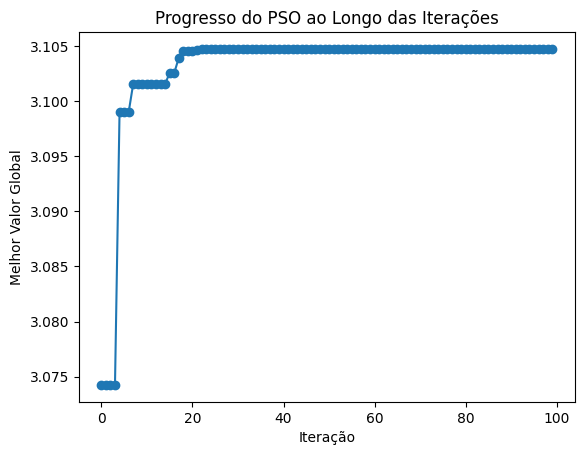

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_funcao_objetivo(x, y):
    """ Função objetivo do problema de otimização. """
    return -(x**2 / 2) - (y**2 / 2) + x - 2 * y + np.cos(x * y)

def executar_pso(funcao_objetivo, qtd_particulas, dimensoes, iteracoes, limites):
    """ Executa o algoritmo Particle Swarm Optimization (PSO). """

    inercia = 0.5
    coef_pessoal = 1.5
    coef_social = 1.5

    particulas = np.random.uniform(limites[0], limites[1], (qtd_particulas, dimensoes))
    velocidades = np.random.uniform(-1, 1, (qtd_particulas, dimensoes))
    melhores_posicoes_individuais = np.copy(particulas)
    melhores_valores_individuais = np.array([funcao_objetivo(x[0], x[1]) for x in particulas])
    melhor_posicao_global = particulas[np.argmax(melhores_valores_individuais)]
    melhor_valor_global = np.max(melhores_valores_individuais)

    historico_melhor_global = []

    for iteracao in range(iteracoes):
        for i in range(qtd_particulas):
            termo_inercia = inercia * velocidades[i]
            termo_pessoal = coef_pessoal * np.random.rand() * (melhores_posicoes_individuais[i] - particulas[i])
            termo_social = coef_social * np.random.rand() * (melhor_posicao_global - particulas[i])
            velocidades[i] = termo_inercia + termo_pessoal + termo_social

            particulas[i] += velocidades[i]
            particulas[i] = np.clip(particulas[i], limites[0], limites[1])

            valor_atual = funcao_objetivo(particulas[i, 0], particulas[i, 1])

            if valor_atual > melhores_valores_individuais[i]:
                melhores_valores_individuais[i] = valor_atual
                melhores_posicoes_individuais[i] = particulas[i]

                if valor_atual > melhor_valor_global:
                    melhor_valor_global = valor_atual
                    melhor_posicao_global = particulas[i]

        historico_melhor_global.append(melhor_valor_global)
        print(f"Iteração {iteracao + 1}/{iteracoes}, Melhor Valor Global: {melhor_valor_global:.4f}")

    return melhor_posicao_global, melhor_valor_global, historico_melhor_global

def visualizar_progresso(historico):
    """ Visualiza o progresso da otimização. """
    plt.plot(historico, marker='o')
    plt.xlabel('Iteração')
    plt.ylabel('Melhor Valor Global')
    plt.title('Progresso do PSO ao Longo das Iterações')
    plt.show()

# Configurações do PSO
qtd_particulas = 30
dimensoes = 2
iteracoes = 100
limites = (-5, 5)

# Execução
# Executando o PSO
melhor_posicao, melhor_valor, historico_melhor_global = executar_pso(
    calcular_funcao_objetivo, qtd_particulas, dimensoes, iteracoes, limites
)

# Exibindo a melhor posição e o melhor valor encontrados
print(f"Melhor posição encontrada: {np.round(melhor_posicao, 4)}")
print(f"Melhor valor encontrado: {np.round(melhor_valor, 4)}")

# Visualizando o progresso da otimização
visualizar_progresso(historico_melhor_global)
